In [1]:
import numpy as numpy 
import pandas as pd
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
data = load_wine()
wine = pd.DataFrame(data.data, columns=data.feature_names)

In [3]:
print(wine.shape)

(178, 13)


In [4]:
wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [5]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
wine.iloc[:,:5].describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium
count,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573
std,0.811827,1.117146,0.274344,3.339564,14.282484
min,11.030000,0.740000,1.360000,10.600000,70.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000


In [7]:
from pandas.plotting import scatter_matrix


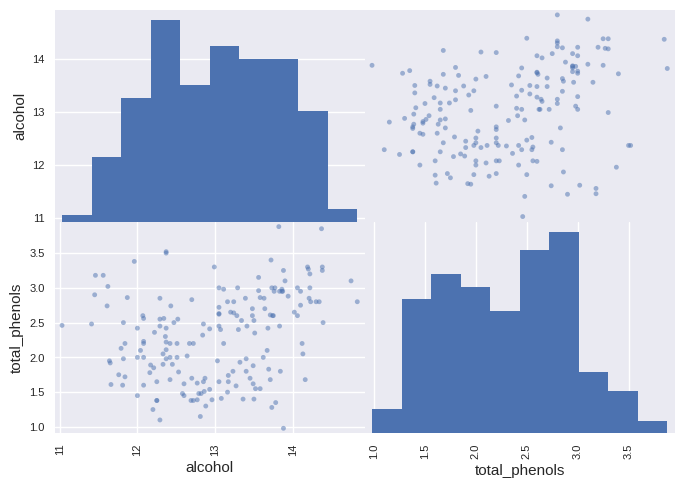

In [8]:
scatter_matrix(wine.iloc[:,[0,5]])
plt.show()

In [9]:
# FEATURES Determined
X = wine[['alcohol', 'total_phenols']]

In [10]:
X

,alcohol,total_phenols
0,14.23,2.80
1,13.20,2.65
2,13.16,2.80
3,14.37,3.85
4,13.24,2.80
...,...,...
173,13.71,1.68
174,13.40,1.80
175,13.27,1.59
176,13.17,1.65


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scale = StandardScaler()

In [13]:
scale.fit(X)

StandardScaler()

In [14]:
numpy.round(scale.mean_, 2)

array([13. ,  2.3])

In [15]:
numpy.round(scale.scale_, 2)

array([0.81, 0.62])

In [16]:
X_scaled = scale.transform(X)

In [17]:
print(X_scaled.mean(axis=0))

[ 7.84141790e-15 -1.95536471e-16]


In [18]:
print(X_scaled.std(axis=0))

[1. 1.]


In [19]:
X_scaled

array([[ 1.51861254,  0.80899739],
       [ 0.24628963,  0.56864766],
       [ 0.19687903,  0.80899739],
       [ 1.69154964,  2.49144552],
       [ 0.29570023,  0.80899739],
       [ 1.48155459,  1.56209322],
       [ 1.71625494,  0.32829793],
       [ 1.3086175 ,  0.48853108],
       [ 2.25977152,  0.80899739],
       [ 1.0615645 ,  1.09741707],
       [ 1.3580281 ,  1.04934713],
       [ 1.38273339, -0.15240153],
       [ 0.92568536,  0.48853108],
       [ 2.16095032,  1.28969686],
       [ 1.70390229,  1.61016317],
       [ 0.77745356,  0.88911397],
       [ 1.60508109,  0.80899739],
       [ 1.02450655,  1.04934713],
       [ 1.46920194,  1.61016317],
       [ 0.78980621,  0.64876424],
       [ 1.3086175 ,  1.1294637 ],
       [-0.08723191,  0.18408809],
       [ 0.87627476,  0.5045544 ],
       [-0.18605311,  0.2962513 ],
       [ 0.61686912,  0.37636788],
       [ 0.06099988,  0.53660103],
       [ 0.48098997,  0.88911397],
       [ 0.36981612,  0.16806478],
       [ 1.07391715,

In [20]:
from sklearn.cluster import KMeans


In [21]:
kmeans = KMeans(n_clusters=3)

In [22]:
kmeans.fit(X_scaled)

KMeans(n_clusters=3)

In [23]:
y_pred = kmeans.predict(X_scaled)

In [24]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 1,
       0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0], dtype=int32)

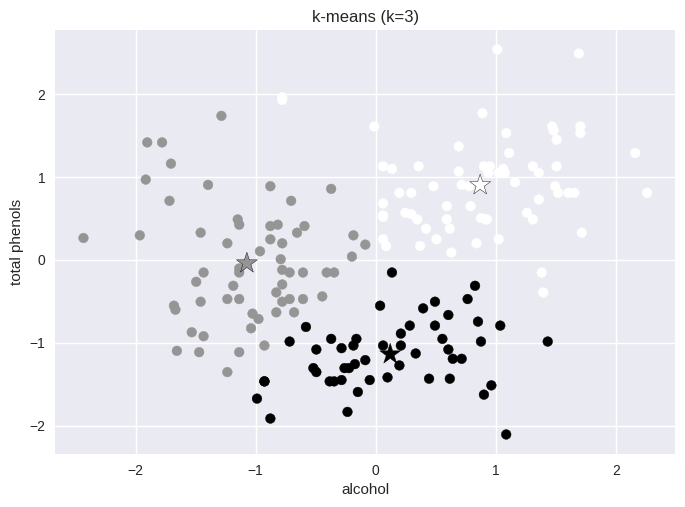

In [25]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c= y_pred)
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],marker="*",s = 250, c = [0,1,2], edgecolors='k')
plt.xlabel('alcohol'); plt.ylabel('total phenols')
plt.title('k-means (k=3)')
plt.show()

In [26]:
X_new = numpy.array([[13, 2.5]])

In [27]:
X_new_scaled = scale.transform(X_new)
print(X_new_scaled)

[[-0.00076337  0.32829793]]


/home/gero/Downloads/Coding/Gero Python/Machine-Learning-With-Python-fCC/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [28]:
X_new = numpy.array([[13, 2.5]])
X_new_scaled = scale.transform(X_new)
print(kmeans.predict(X_new_scaled))

[0]


/home/gero/Downloads/Coding/Gero Python/Machine-Learning-With-Python-fCC/venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [29]:
kmeans.inertia_

114.66168012587147

In [30]:
inertia = []
for i in numpy.arange(1, 11):
    km = KMeans(
        n_clusters=i
    )
    km.fit(X_scaled)
    inertia.append(km.inertia_)

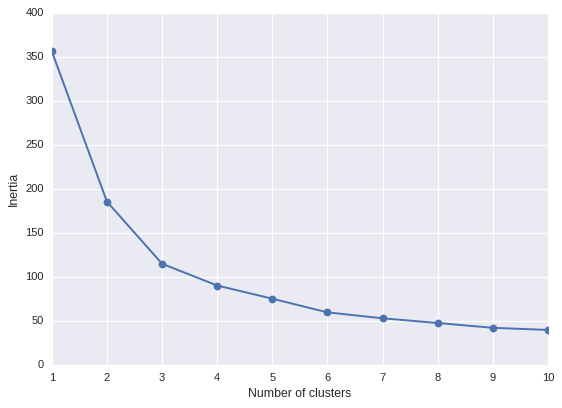

In [36]:
# plot
plt.plot(numpy.arange(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
# plt.savefig("plot.png")
plt.style.use("seaborn-v0_8")
plt.show()